In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(figsize=(8, 6), dpi=80)
from sklearn.model_selection import train_test_split,RepeatedStratifiedKFold,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier,RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

<Figure size 640x480 with 0 Axes>

In [2]:
X_train=pd.read_csv(r"Data\UCI_Data\final_X_train.txt", delimiter=",",header=None)
Y_train=pd.read_csv(r"Data\UCI_Data\final_y_train.txt", delimiter=",",header=None)
data=X_train.copy(deep=True)
data['class']=Y_train
data=data.sample(frac=1,ignore_index=True)
labels=data['class']
data=data.drop('class',axis=1)

In [3]:
data.describe()

,0,1,2,3,4,5,6,7,8,9,...,551,552,553,554,555,556,557,558,559,560
count,4252.000000,4252.000000,4252.000000,4252.000000,4252.000000,4252.000000,4252.000000,4252.000000,4252.000000,4252.000000,...,4252.000000,4252.000000,4252.000000,4252.000000,4252.000000,4252.000000,4252.000000,4252.000000,4252.000000,4252.000000
mean,0.328098,-0.016892,-0.105908,-0.657875,-0.545393,-0.568119,-0.692565,-0.555668,-0.567608,-0.470899,...,0.132243,-0.289747,-0.618739,-0.026148,0.032900,0.002336,-0.003853,-0.525921,0.070942,-0.022324
std,0.342924,0.064407,0.116318,0.357233,0.428247,0.409752,0.331081,0.422234,0.415663,0.510689,...,0.235170,0.294440,0.285924,0.327898,0.445712,0.595877,0.514740,0.434306,0.244521,0.310260
min,-2.558400,-0.885720,-1.006100,-1.000100,-0.999270,-1.005300,-1.000000,-0.999280,-1.005400,-0.951790,...,-0.793830,-0.955590,-1.006300,-1.001000,-0.992450,-0.995690,-0.987830,-0.997540,-0.795520,-1.093500
25%,0.260400,-0.027013,-0.129390,-0.985930,-0.963715,-0.966993,-0.987775,-0.964815,-0.966835,-0.928032,...,-0.007369,-0.500945,-0.826232,-0.120405,-0.240812,-0.554740,-0.450703,-0.800307,-0.062248,-0.135370
50%,0.277880,-0.017045,-0.108480,-0.711575,-0.555900,-0.566125,-0.753750,-0.568120,-0.563235,-0.568920,...,0.148570,-0.323800,-0.695040,0.006337,0.027131,0.004438,-0.005088,-0.676585,0.061055,0.040008
75%,0.300503,-0.006720,-0.090234,-0.413538,-0.187390,-0.235937,-0.484675,-0.207490,-0.241415,-0.133987,...,0.292135,-0.115175,-0.494525,0.101587,0.317148,0.551520,0.437635,-0.496592,0.192235,0.185645
max,2.409900,0.769080,1.658900,0.947430,1.594100,2.041200,1.024800,1.864200,2.464300,1.746400,...,0.864680,0.942590,0.933850,0.995080,1.011000,0.996520,0.993710,0.937120,0.825490,0.629590


In [4]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
data_scaled = pd.DataFrame(scalar.fit_transform(data), columns=data.columns)
data_scaled

,0,1,2,3,4,5,6,7,8,9,...,551,552,553,554,555,556,557,558,559,560
0,0.487576,-0.137581,0.333963,0.818232,2.234521,1.455378,0.792271,2.414631,1.547660,0.959945,...,1.177058,-0.132479,-0.200218,-1.314561,-1.238592,-0.622460,-0.511516,0.175566,-0.694652,1.197989
1,-0.067713,-0.061338,-0.017813,0.635473,0.691560,0.691106,0.585409,0.789959,0.664193,0.516224,...,-0.131806,0.511971,0.481616,-1.629665,-1.800479,0.887526,-0.680456,-0.003200,-0.453752,1.116628
2,-0.166931,0.000852,0.026725,-0.930887,-1.010767,-1.000091,-0.900234,-1.007220,-0.992271,-0.913679,...,-0.656470,1.306803,1.360764,0.247143,0.536799,0.341342,0.302213,0.675987,1.521803,-1.095358
3,-0.232696,-0.013574,0.031283,-0.880802,-1.027535,-1.037533,-0.844834,-1.014728,-1.023213,-0.888828,...,0.490199,-1.322163,-0.936724,0.208084,0.558991,-1.254058,1.380806,2.213450,-3.024812,-0.928285
4,-0.159435,1.782648,-0.860517,0.213122,0.670752,1.035502,0.111421,0.585830,0.886539,0.600218,...,-0.536062,-0.331558,-0.667005,0.018097,0.234169,0.725259,-1.423267,-0.662514,0.208098,0.558708
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4247,-0.755299,-0.157596,-0.129073,1.555232,1.362661,2.195779,1.436903,1.279002,1.847527,0.820948,...,0.531834,0.046390,-0.085524,2.148535,-1.495470,-0.958828,-1.412523,-0.001288,-0.468510,1.112470
4248,5.627274,3.149115,-1.751027,3.022738,1.745936,1.100012,3.159315,1.782418,0.989784,3.554046,...,0.642192,-0.926553,-0.864913,-2.864949,-0.917742,1.302124,1.487125,-0.281585,-0.779093,0.504746
4249,-0.055814,-0.403141,-0.852779,0.416038,-0.027877,0.773727,0.360664,-0.032289,0.849173,0.401052,...,0.211177,0.694678,0.281539,-0.549173,0.971391,-1.313171,1.331591,-0.189657,-0.637505,0.795376
4250,5.802843,-2.485699,-0.464917,2.627935,0.402580,1.037088,2.892762,0.273218,0.595596,2.602259,...,-0.571759,-0.776284,-0.773550,-2.849028,0.274648,1.612828,-1.683196,-0.742858,0.539357,0.115189


In [5]:
# Method 1 for dimension reduction
from sklearn.ensemble import RandomForestRegressor
model1=RandomForestRegressor(random_state=2,max_depth=10)
model1.fit(data,labels)
print("Dimension Reduction done")

Dimension Reduction done


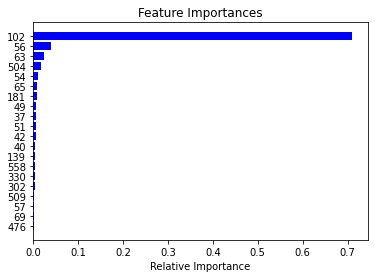

In [7]:
features=data.columns
importances=model1.feature_importances_
indices = np.argsort(importances)[-20:]  # top 80 features
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()
selected_features=[features[i] for i in indices]

In [8]:
data_after_RF=data[selected_features]

In [9]:
data_after_RF

,476,69,57,509,302,330,558,139,40,42,51,37,49,181,65,54,504,63,56,102
0,-0.93920,-0.360030,-0.84522,-0.420100,-0.840000,-0.71673,-0.44968,-0.518050,0.76825,-0.453840,-0.422650,0.226180,0.76011,-0.30767,-0.46445,-0.488420,-0.35167,-0.089152,0.42072,0.76576
1,-0.98414,-0.385190,-0.92695,-0.606070,-0.879270,-0.74628,-0.52731,-0.491170,0.79390,-0.411740,-0.396410,0.432900,0.74271,-0.54437,-0.49796,-0.424580,-0.37166,-0.240820,0.47817,0.60630
2,-0.99990,-0.148650,-0.60028,-0.990830,-0.999910,-0.99964,-0.23237,-0.994250,0.50827,0.491060,0.481790,0.341230,0.43831,-0.99245,-0.33663,0.490890,-0.98703,-1.000000,-0.11256,-0.69983
3,-0.99992,-0.119280,0.60993,-0.990390,-0.999340,-0.99987,0.43528,-0.994410,-0.25050,0.461070,0.450480,0.386420,-0.31351,-0.99768,-0.89598,0.461180,-0.98073,-1.000000,-0.95382,-0.65005
4,-0.78730,-0.351000,-0.99467,-0.448230,-0.953290,-0.70840,-0.81362,0.084361,0.92421,-0.180530,-0.138210,0.088951,0.86557,-0.70401,-0.24201,-0.233620,-0.32155,-0.627590,0.79741,0.55310
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4247,-0.92617,0.066643,-0.91803,0.174380,-0.556080,-0.33937,-0.52648,-0.052289,0.83497,-0.423730,-0.378490,0.144240,0.79832,-0.33187,-0.64483,-0.453870,0.21002,-0.430500,0.57605,0.36228
4248,-0.97095,-0.484220,-0.91406,-0.023797,0.243010,-0.57473,-0.64820,-0.440740,0.28219,-0.086592,-0.003381,0.677380,0.90108,-0.59649,-0.82353,-0.185300,0.87749,0.621290,-0.21359,0.71140
4249,-0.87863,-0.176820,-0.86717,-0.613510,-0.963600,-0.76530,-0.60828,-0.318650,0.86238,-0.285170,-0.253760,0.016757,0.79221,-0.72603,-0.12901,-0.328760,-0.50134,0.057368,0.64200,0.70025
4250,-0.98043,-0.226050,-0.97890,-0.242080,0.018924,-0.77287,-0.84851,-0.322300,0.27427,0.008927,0.026156,-0.577310,0.93898,-0.60876,-0.80642,-0.029883,0.57803,-1.000000,-0.20572,0.52263


In [10]:
labels

0       2
1       2
2       4
3       6
4       1
       ..
4247    3
4248    2
4249    2
4250    1
4251    3
Name: class, Length: 4252, dtype: int64

<h1 > Halt and Stop </h1>
<h2> PCA Code </h2>

In [65]:
from sklearn.decomposition import PCA
pca_1 = PCA(n_components=20)
principalComponents = pca_1.fit_transform(X_train)
data_after_RF=pd.DataFrame(principalComponents)
data_after_RF

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,17.629531,14.856823,10.593409,-3.781079,-0.230631,-2.629830,2.825996,-8.828905,-3.269102,-6.578480,2.159592,1.837202,-1.987490,1.322127,2.970779,-3.654699,2.091649,-3.082109,0.733009,-0.820087
1,8.315133,4.921955,-3.995595,-2.255632,-0.461161,0.916194,1.667741,-3.197429,1.044379,0.097800,0.168932,-0.695841,-1.567962,0.494077,-0.723823,-0.442762,1.914127,2.452142,2.941270,-0.875028
2,5.155627,2.154239,-5.819888,-1.102799,0.287754,1.054957,-0.567482,-2.257072,-1.038818,-1.656368,-0.147627,-0.803911,-0.978908,-1.965637,-0.601632,-1.967115,-2.640024,2.022526,2.801107,-0.959965
3,3.103288,3.767917,-6.018159,-1.677049,1.064371,0.691963,-1.510585,-1.111558,-1.349424,-2.358492,0.466362,-1.070167,0.433423,-2.167386,-0.530678,-2.469406,-3.085323,-0.314081,0.525884,-0.751699
4,1.893014,6.439557,-5.857893,-1.931942,0.319152,-0.173189,-0.837526,-1.445935,0.938064,-0.741610,-1.252487,0.630344,-1.756081,-1.811645,0.272141,-1.653960,-1.236539,-0.055979,0.671251,-2.306505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4247,-15.346321,-5.223540,2.066638,-0.071040,-2.737702,2.245572,-2.540565,-2.358935,-0.237690,-1.986813,1.721676,0.451884,0.742498,-0.463987,4.093653,4.451495,-1.226662,-5.124464,2.369892,2.796131
4248,-15.632898,-7.127824,2.817008,0.017201,-2.730833,2.092721,-3.115867,-3.415086,-1.001908,-2.261312,1.836727,0.698259,0.570752,-0.425441,4.355570,5.076866,-2.319139,-4.613177,3.123821,1.958682
4249,-17.016423,-9.349355,5.325734,1.912351,-1.780125,1.598338,-3.942679,-2.457444,-1.664441,1.860920,0.076592,1.036340,-5.423483,-1.701017,4.847681,2.904304,-1.793181,-3.872349,1.418040,0.675944
4250,-17.054935,-8.611769,3.950561,1.225732,0.202216,2.609193,-3.498617,-0.149453,-2.515303,-0.557511,1.498262,0.026294,-3.384069,-3.548249,3.816402,2.331627,-2.298082,-3.585890,-0.505159,1.327229


<h2> PCA STOP </h2>

In [11]:
# Defining Splitter for the dataset (Common for all)
def splitter(len_array,lower_bound, incrementor, start_idx):
    final=0
    per=[]
    sp=[start_idx]
    for i in range(lower_bound,100,incrementor):
        if final+i>100:
            break
        per.append(i)
        final+=i
    for i in per:
        len_of_data=round((i/100)*len_array)
        sp.append(sp[-1]+len_of_data)
    return per,sp

lower_bound=5
incrementor=5
start_idx=0

        
spliting_percentage, spliting_position=splitter(len(data),lower_bound,incrementor,start_idx)
print("Splitting Percentages are: {}".format(spliting_percentage))
print("Splitting Position are: {}".format(spliting_position))

Splitting Percentages are: [5, 10, 15, 20, 25]
Splitting Position are: [0, 213, 638, 1276, 2126, 3189]


In [12]:
data_for_experiment=data_after_RF.copy(deep=True)
labels_for_experiment=labels.copy(deep=True)

In [13]:
data_after_RF

,476,69,57,509,302,330,558,139,40,42,51,37,49,181,65,54,504,63,56,102
0,-0.93920,-0.360030,-0.84522,-0.420100,-0.840000,-0.71673,-0.44968,-0.518050,0.76825,-0.453840,-0.422650,0.226180,0.76011,-0.30767,-0.46445,-0.488420,-0.35167,-0.089152,0.42072,0.76576
1,-0.98414,-0.385190,-0.92695,-0.606070,-0.879270,-0.74628,-0.52731,-0.491170,0.79390,-0.411740,-0.396410,0.432900,0.74271,-0.54437,-0.49796,-0.424580,-0.37166,-0.240820,0.47817,0.60630
2,-0.99990,-0.148650,-0.60028,-0.990830,-0.999910,-0.99964,-0.23237,-0.994250,0.50827,0.491060,0.481790,0.341230,0.43831,-0.99245,-0.33663,0.490890,-0.98703,-1.000000,-0.11256,-0.69983
3,-0.99992,-0.119280,0.60993,-0.990390,-0.999340,-0.99987,0.43528,-0.994410,-0.25050,0.461070,0.450480,0.386420,-0.31351,-0.99768,-0.89598,0.461180,-0.98073,-1.000000,-0.95382,-0.65005
4,-0.78730,-0.351000,-0.99467,-0.448230,-0.953290,-0.70840,-0.81362,0.084361,0.92421,-0.180530,-0.138210,0.088951,0.86557,-0.70401,-0.24201,-0.233620,-0.32155,-0.627590,0.79741,0.55310
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4247,-0.92617,0.066643,-0.91803,0.174380,-0.556080,-0.33937,-0.52648,-0.052289,0.83497,-0.423730,-0.378490,0.144240,0.79832,-0.33187,-0.64483,-0.453870,0.21002,-0.430500,0.57605,0.36228
4248,-0.97095,-0.484220,-0.91406,-0.023797,0.243010,-0.57473,-0.64820,-0.440740,0.28219,-0.086592,-0.003381,0.677380,0.90108,-0.59649,-0.82353,-0.185300,0.87749,0.621290,-0.21359,0.71140
4249,-0.87863,-0.176820,-0.86717,-0.613510,-0.963600,-0.76530,-0.60828,-0.318650,0.86238,-0.285170,-0.253760,0.016757,0.79221,-0.72603,-0.12901,-0.328760,-0.50134,0.057368,0.64200,0.70025
4250,-0.98043,-0.226050,-0.97890,-0.242080,0.018924,-0.77287,-0.84851,-0.322300,0.27427,0.008927,0.026156,-0.577310,0.93898,-0.60876,-0.80642,-0.029883,0.57803,-1.000000,-0.20572,0.52263


In [14]:
labels_for_experiment

0       2
1       2
2       4
3       6
4       1
       ..
4247    3
4248    2
4249    2
4250    1
4251    3
Name: class, Length: 4252, dtype: int64

# Apply ML Algorithms

In [15]:
# SImple Algorithm
# splitting dataset into training and testing part
test_data_ratio=[0.2]
for i in test_data_ratio:
    print("******************Start of iteration******************\n")
    print("For ratio ",i)
    X_train, X_test, y_train, y_test=train_test_split(data_after_RF,labels,test_size=i,shuffle=True)
    model = LogisticRegression(max_iter=1000)
    solvers = ["lbfgs","liblinear"]
    penalty = ['l2']
    c_values = [5]
    # define grid search
    grid = dict(solver=solvers,penalty=penalty,C=c_values)
    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=5, random_state=42)
    grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='f1',error_score=0,)
    grid_result = grid_search.fit(X_train, y_train)
    # summarize results
    print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
    means = grid_result.cv_results_['mean_test_score']
    stds = grid_result.cv_results_['std_test_score']
    params = grid_result.cv_results_['params']
    
    #Predict the response for test dataset
    y_pred = grid_search.predict(X_test)
    print(confusion_matrix(y_test,y_pred))
    print("\n")
    print(classification_report(y_test,y_pred))
#     print("Training set score for logreg_model: %f" % grid_search.score(X_train , y_train))
#     print("Testing  set score for logreg_model: %f" % grid_search.score(X_test  , y_test ))

    print("******************End of iteration******************\n")

******************Start of iteration******************

For ratio  0.2
Best: 0.000000 using {'C': 5, 'penalty': 'l2', 'solver': 'lbfgs'}
[[126  12  14   0   0   0]
 [ 14  92  21   1   0   5]
 [ 12  14 105   0   0   1]
 [  0   3   0 106  53   4]
 [  1   2   1  28 126   0]
 [  0   3   0   2   0 105]]


              precision    recall  f1-score   support

           1       0.82      0.83      0.83       152
           2       0.73      0.69      0.71       133
           3       0.74      0.80      0.77       132
           4       0.77      0.64      0.70       166
           5       0.70      0.80      0.75       158
           6       0.91      0.95      0.93       110

    accuracy                           0.78       851
   macro avg       0.78      0.78      0.78       851
weighted avg       0.78      0.78      0.77       851

******************End of iteration******************



In [16]:
for i in range(len(spliting_position)-1):
    print("******************Start of iteration******************")
    print("Splitting percentage is {}".format(spliting_percentage[i]))
    
    X_train=pd.DataFrame(data_for_experiment.iloc[spliting_position[i]:spliting_position[i+1],:])
    Y_train=labels_for_experiment.iloc[spliting_position[i]:spliting_position[i+1]]
    X_test=data_for_experiment.drop(X_train.index, axis=0).sample(len(X_train))
    Y_test=np.array(pd.DataFrame(labels_for_experiment,index=X_test.index))
    
    print("Shape of training input X_train: {}".format(X_train.shape))
    print("Shape of testing input X_test: {}".format(X_test.shape))
    print("Shape of training output Y_train: {}".format(Y_train.shape))
    print("Shape of testing output Y_test: {}".format(Y_test.shape))

    model = LogisticRegression(max_iter=1000)
    solvers = ["lbfgs","liblinear"]
    penalty = ['l2','l1']
    c_values = [10]
    # define grid search
    grid = dict(solver=solvers,penalty=penalty,C=c_values)
    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=5, random_state=42)
    grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=2, cv=cv, scoring='f1',error_score=0,)
    grid_result = grid_search.fit(X_train, Y_train)
    # summarize results
    print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
    means = grid_result.cv_results_['mean_test_score']
    stds = grid_result.cv_results_['std_test_score']
    params = grid_result.cv_results_['params']
    
    #Predict the response for test dataset
    Y_pred = grid_search.predict(X_test)
    print(confusion_matrix(Y_test,Y_pred))
    print("\n")
    print(classification_report(Y_test,Y_pred))

    print("******************End of iteration******************\n")

******************Start of iteration******************
Splitting percentage is 5
Shape of training input X_train: (213, 20)
Shape of testing input X_test: (213, 20)
Shape of training output Y_train: (213,)
Shape of testing output Y_test: (213, 1)
Best: 0.000000 using {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
[[24  3  4  0  0  0]
 [ 3 22  4  1  0  1]
 [ 5  6 19  0  0  0]
 [ 0  0  0 28  9  1]
 [ 0  1  0 22 24  0]
 [ 0  2  0  2  0 32]]


              precision    recall  f1-score   support

           1       0.75      0.77      0.76        31
           2       0.65      0.71      0.68        31
           3       0.70      0.63      0.67        30
           4       0.53      0.74      0.62        38
           5       0.73      0.51      0.60        47
           6       0.94      0.89      0.91        36

    accuracy                           0.70       213
   macro avg       0.72      0.71      0.71       213
weighted avg       0.72      0.70      0.70       213

**************

# ****KNN Classifer ****

In [17]:
# splitting dataset into training and testing part
test_data_ratio=[0.2]
for i in test_data_ratio:
    print("******************Start of iteration******************\n")
    print("For ratio ",i)
    X_train, X_test, y_train, y_test=train_test_split(data_after_RF,labels,test_size=i,shuffle=True)
    model = KNeighborsClassifier()
    params_grid = [{'n_neighbors': [2,3,4], 'weights' :['uniform'],'leaf_size':[4,5,6,7,8,9],'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute']}]
    knn_model = GridSearchCV(model, params_grid, cv=5)
    knn_model.fit(X_train,y_train)
    print('Best score for training data:', knn_model.best_score_,"\n") 

    # View the best parameters for the model found using grid search
    print('Best #neighbors:',knn_model.best_estimator_.n_neighbors,"\n") 
    print('Best weights:',knn_model.best_estimator_.weights,"\n")
    print('Best leaf_size:',knn_model.best_estimator_.leaf_size,"\n")
    print('Best algorithm:',knn_model.best_estimator_.algorithm,"\n")
    final_model = knn_model.best_estimator_

    
    #Predict the response for test dataset
    y_pred = final_model.predict(X_test)
    print(confusion_matrix(y_test,y_pred))
    print("\n")
    print(classification_report(y_test,y_pred))
    print("Training set score for knn_model: %f" % final_model.score(X_train , y_train))
    print("Testing  set score for knn_model: %f" % final_model.score(X_test  , y_test ))

    print("******************End of iteration******************\n")

******************Start of iteration******************

For ratio  0.2
Best score for training data: 0.8776785868532435 

Best #neighbors: 3 

Best weights: uniform 

Best leaf_size: 4 

Best algorithm: auto 

[[122   3   4   0   0   0]
 [ 13 121   7   0   0   0]
 [ 17   7 126   0   0   0]
 [  0   1   0 137  32   2]
 [  0   2   0  17 128   0]
 [  0   3   0   1   0 108]]


              precision    recall  f1-score   support

           1       0.80      0.95      0.87       129
           2       0.88      0.86      0.87       141
           3       0.92      0.84      0.88       150
           4       0.88      0.80      0.84       172
           5       0.80      0.87      0.83       147
           6       0.98      0.96      0.97       112

    accuracy                           0.87       851
   macro avg       0.88      0.88      0.88       851
weighted avg       0.88      0.87      0.87       851

Training set score for knn_model: 0.943840
Testing  set score for knn_model: 0.871

In [122]:
# splitting dataset into training and testing part
for i in range(len(spliting_position)-1):
    print("******************Start of iteration******************")
    print("Splitting percentage is {}".format(spliting_percentage[i]))
    
    X_train=pd.DataFrame(data_for_experiment.iloc[spliting_position[i]:spliting_position[i+1],:])
    Y_train=labels_for_experiment.iloc[spliting_position[i]:spliting_position[i+1]]
    X_test=data_for_experiment.drop(X_train.index, axis=0).sample(len(X_train))
    Y_test=np.array(pd.DataFrame(labels_for_experiment,index=X_test.index))
    
    print("Shape of training input X_train: {}".format(X_train.shape))
    print("Shape of testing input X_test: {}".format(X_test.shape))
    print("Shape of training output Y_train: {}".format(Y_train.shape))
    print("Shape of testing output Y_test: {}".format(Y_test.shape))
    model = KNeighborsClassifier()
    params_grid = [{'n_neighbors': [2,3,4], 'weights' :['uniform'],'leaf_size':[4,5,6,7,8,9],'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute']}]
    knn_model = GridSearchCV(model, params_grid, cv=5)
    knn_model.fit(X_train,Y_train)
    print('Best score for training data:', knn_model.best_score_,"\n") 

    # View the best parameters for the model found using grid search
    print('Best #neighbors:',knn_model.best_estimator_.n_neighbors,"\n") 
    print('Best weights:',knn_model.best_estimator_.weights,"\n")
    print('Best leaf_size:',knn_model.best_estimator_.leaf_size,"\n")
    print('Best algorithm:',knn_model.best_estimator_.algorithm,"\n")
    final_model = knn_model.best_estimator_

    
    #Predict the response for test dataset
    Y_pred = final_model.predict(X_test)
    print(confusion_matrix(Y_test,Y_pred))
    print("\n")
    print(classification_report(y_test,y_pred))
    print("Training set score for knn_model: %f" % final_model.score(X_train , Y_train))
    print("Testing  set score for knn_model: %f" % final_model.score(X_test  , Y_test ))

    print("******************End of iteration******************\n")

******************Start of iteration******************
Splitting percentage is 5
Shape of training input X_train: (213, 20)
Shape of testing input X_test: (213, 20)
Shape of training output Y_train: (213,)
Shape of testing output Y_test: (213, 1)
Best score for training data: 0.7132890365448505 

Best #neighbors: 3 

Best weights: uniform 

Best leaf_size: 4 

Best algorithm: auto 

[[29  1  3  0  0  0]
 [ 7 24  5  0  0  0]
 [ 6  4 21  0  0  0]
 [ 0  2  0 37 11  0]
 [ 2  0  0  8 32  0]
 [ 0  3  0  0  0 18]]


              precision    recall  f1-score   support

           1       0.91      0.92      0.91       168
           2       0.87      0.90      0.89       124
           3       0.90      0.91      0.90       141
           4       0.87      0.77      0.82       157
           5       0.81      0.86      0.84       147
           6       0.97      0.96      0.97       114

    accuracy                           0.88       851
   macro avg       0.89      0.89      0.89       8

# ** Support Vector Machine **

In [18]:
# splitting dataset into training and testing part


test_data_ratio=[0.2]
for i in test_data_ratio:
    print("******************Start of iteration******************\n")
    print("For ratio ",i)
    X_train, X_test, y_train, y_test=train_test_split(data_after_RF,labels,test_size=i,shuffle=True)
    model = SVC()
    params_grid = [{'kernel': ['linear'], 'C': [2]}]
    svm_model = GridSearchCV(model, params_grid, cv=3)
    svm_model.fit(X_train,y_train)
    print('Best score for training data:', svm_model.best_score_,"\n") 

    # View the best parameters for the model found using grid search
    print('Best C:',svm_model.best_estimator_.C,"\n") 
    print('Best Kernel:',svm_model.best_estimator_.kernel,"\n")
    print('Best Gamma:',svm_model.best_estimator_.gamma,"\n")
    final_model = svm_model.best_estimator_

    
    #Predict the response for test dataset
    y_pred = final_model.predict(X_test)
    print(confusion_matrix(y_test,y_pred))
    print("\n")
    print(classification_report(y_test,y_pred))
    print("Training set score for svm_model: %f" % final_model.score(X_train , y_train))
    print("Testing  set score for svm_model: %f" % final_model.score(X_test  , y_test ))

    print("******************End of iteration******************\n")

******************Start of iteration******************

For ratio  0.2
Best score for training data: 0.777416378818752 

Best C: 2 

Best Kernel: linear 

Best Gamma: scale 

[[134   9  15   0   0   0]
 [ 18  76  18   1   0   7]
 [ 11  15  98   0   0   0]
 [  0   3   0 110  69   7]
 [  2   0   1  18 143   0]
 [  0   1   0   1   0  94]]


              precision    recall  f1-score   support

           1       0.81      0.85      0.83       158
           2       0.73      0.63      0.68       120
           3       0.74      0.79      0.77       124
           4       0.85      0.58      0.69       189
           5       0.67      0.87      0.76       164
           6       0.87      0.98      0.92        96

    accuracy                           0.77       851
   macro avg       0.78      0.78      0.77       851
weighted avg       0.78      0.77      0.77       851

Training set score for svm_model: 0.792708
Testing  set score for svm_model: 0.769683
******************End of iterat

In [125]:
# splitting dataset into training and testing part

for i in range(len(spliting_position)-1):
    print("******************Start of iteration******************")
    print("Splitting percentage is {}".format(spliting_percentage[i]))
    
    X_train=pd.DataFrame(data_for_experiment.iloc[spliting_position[i]:spliting_position[i+1],:])
    y_train=labels_for_experiment.iloc[spliting_position[i]:spliting_position[i+1]]
    X_test=data_for_experiment.drop(X_train.index, axis=0).sample(len(X_train))
    y_test=np.array(pd.DataFrame(labels_for_experiment,index=X_test.index))
    
    print("Shape of training input X_train: {}".format(X_train.shape))
    print("Shape of testing input X_test: {}".format(X_test.shape))
    print("Shape of training output Y_train: {}".format(Y_train.shape))
    print("Shape of testing output Y_test: {}".format(Y_test.shape))
    
    model = SVC()
    params_grid = [{'kernel': ['linear'], 'C': [100,150]}]
    svm_model = GridSearchCV(model, params_grid, cv=3)
    svm_model.fit(X_train,y_train)
    print('Best score for training data:', svm_model.best_score_,"\n") 

    # View the best parameters for the model found using grid search
    print('Best C:',svm_model.best_estimator_.C,"\n") 
    print('Best Kernel:',svm_model.best_estimator_.kernel,"\n")
    print('Best Gamma:',svm_model.best_estimator_.gamma,"\n")
    final_model = svm_model.best_estimator_

    
    #Predict the response for test dataset
    y_pred = final_model.predict(X_test)
    print(confusion_matrix(y_test,y_pred))
    print("\n")
    print(classification_report(y_test,y_pred))
    print("Training set score for svm_model: %f" % final_model.score(X_train , y_train))
    print("Testing  set score for svm_model: %f" % final_model.score(X_test  , y_test ))

    print("******************End of iteration******************\n")

******************Start of iteration******************
Splitting percentage is 5
Shape of training input X_train: (213, 20)
Shape of testing input X_test: (213, 20)
Shape of training output Y_train: (213,)
Shape of testing output Y_test: (213, 1)
Best score for training data: 0.6713615023474179 

Best C: 100 

Best Kernel: linear 

Best Gamma: scale 

[[32  6  0  0  0  0]
 [ 3 15  5  0  0  0]
 [ 8  5 30  0  0  0]
 [ 0  0  0 20 18  2]
 [ 0  0  0  3 35  0]
 [ 0  3  0  0  0 28]]


              precision    recall  f1-score   support

           1       0.74      0.84      0.79        38
           2       0.52      0.65      0.58        23
           3       0.86      0.70      0.77        43
           4       0.87      0.50      0.63        40
           5       0.66      0.92      0.77        38
           6       0.93      0.90      0.92        31

    accuracy                           0.75       213
   macro avg       0.76      0.75      0.74       213
weighted avg       0.78      

# ** Decision Tree **

In [19]:
# splitting dataset into training and testing part

test_data_ratio=[0.2]
for i in test_data_ratio:
    print("******************Start of iteration******************\n")
    print("For ratio ",i)
    X_train, X_test, y_train, y_test=train_test_split(data_after_RF,labels,test_size=i,shuffle=True)
    model = DecisionTreeClassifier()
    params_grid = [{'max_depth': [8,9,10,11,12],'random_state':[42]}]
    dc_model = GridSearchCV(model, params_grid, cv=3)
    dc_model.fit(X_train,y_train)
    print('Best score for training data:', dc_model.best_score_,"\n") 

    # View the best parameters for the model found using grid search
    print('Best depth:',dc_model.best_estimator_.max_depth,"\n") 
    print('Best #features:',dc_model.best_estimator_.max_features,"\n")
    #print('Best Gamma:',dc_model.best_estimator_.,"\n")
    final_model = dc_model.best_estimator_

    
    #Predict the response for test dataset
    y_pred = final_model.predict(X_test)
    print(confusion_matrix(y_test,y_pred))
    print("\n")
    print(classification_report(y_test,y_pred))
    print("Training set score for dc_model: %f" % final_model.score(X_train , y_train))
    print("Testing  set score for dc_model: %f" % final_model.score(X_test  , y_test ))

    print("******************End of iteration******************\n")

******************Start of iteration******************

For ratio  0.2
Best score for training data: 0.8494593025337362 

Best depth: 10 

Best #features: None 

[[116   7  15   0   2   0]
 [ 26 101   9   0   1   3]
 [ 16   9 103   0   0   0]
 [  0   3   0 154  19   1]
 [  1   2   0   4 156   1]
 [  0   1   0   0   0 101]]


              precision    recall  f1-score   support

           1       0.73      0.83      0.78       140
           2       0.82      0.72      0.77       140
           3       0.81      0.80      0.81       128
           4       0.97      0.87      0.92       177
           5       0.88      0.95      0.91       164
           6       0.95      0.99      0.97       102

    accuracy                           0.86       851
   macro avg       0.86      0.86      0.86       851
weighted avg       0.86      0.86      0.86       851

Training set score for dc_model: 0.965892
Testing  set score for dc_model: 0.858989
******************End of iteration************

In [127]:
# splitting dataset into training and testing part

for i in range(len(spliting_position)-1):
    print("******************Start of iteration******************")
    print("Splitting percentage is {}".format(spliting_percentage[i]))
    
    X_train=pd.DataFrame(data_for_experiment.iloc[spliting_position[i]:spliting_position[i+1],:])
    Y_train=labels_for_experiment.iloc[spliting_position[i]:spliting_position[i+1]]
    X_test=data_for_experiment.drop(X_train.index, axis=0).sample(len(X_train))
    Y_test=np.array(pd.DataFrame(labels_for_experiment,index=X_test.index))
    
    print("Shape of training input X_train: {}".format(X_train.shape))
    print("Shape of testing input X_test: {}".format(X_test.shape))
    print("Shape of training output Y_train: {}".format(Y_train.shape))
    print("Shape of testing output Y_test: {}".format(Y_test.shape))
    
    model = DecisionTreeClassifier()
    params_grid = [{'max_depth': [8,9,10,11,12],'random_state':[42]}]
    dc_model = GridSearchCV(model, params_grid, cv=3)
    dc_model.fit(X_train,Y_train)
    print('Best score for training data:', dc_model.best_score_,"\n") 

    # View the best parameters for the model found using grid search
    print('Best depth:',dc_model.best_estimator_.max_depth,"\n") 
    print('Best #features:',dc_model.best_estimator_.max_features,"\n")
    #print('Best Gamma:',dc_model.best_estimator_.,"\n")
    final_model = dc_model.best_estimator_

    
    #Predict the response for test dataset
    Y_pred = final_model.predict(X_test)
    print(confusion_matrix(Y_test,Y_pred))
    print("\n")
    print(classification_report(Y_test,Y_pred))
    print("Training set score for dc_model: %f" % final_model.score(X_train , Y_train))
    print("Testing  set score for dc_model: %f" % final_model.score(X_test  , Y_test ))

    print("******************End of iteration******************\n")

******************Start of iteration******************
Splitting percentage is 5
Shape of training input X_train: (213, 20)
Shape of testing input X_test: (213, 20)
Shape of training output Y_train: (213,)
Shape of testing output Y_test: (213, 1)
Best score for training data: 0.7230046948356806 

Best depth: 8 

Best #features: None 

[[19  6  3  0  0  0]
 [ 3 16  5  0  0  1]
 [ 7 16 24  0  0  0]
 [ 0  0  0 29  8  1]
 [ 1  0  0 14 32  0]
 [ 0  6  0  1  0 21]]


              precision    recall  f1-score   support

           1       0.63      0.68      0.66        28
           2       0.36      0.64      0.46        25
           3       0.75      0.51      0.61        47
           4       0.66      0.76      0.71        38
           5       0.80      0.68      0.74        47
           6       0.91      0.75      0.82        28

    accuracy                           0.66       213
   macro avg       0.69      0.67      0.67       213
weighted avg       0.71      0.66      0.67   

<h1> **************************************************************************************************************</h1>

 <h1> AdaBoost </h1>


In [128]:
# splitting dataset into training and testing part

test_data_ratio=[0.2]
for i in test_data_ratio:
    print("******************Start of iteration******************\n")
    print("For ratio ",i)
    X_train, X_test, y_train, y_test=train_test_split(data_after_RF,labels,test_size=i,shuffle=True)
    model = DecisionTreeClassifier(max_features=None)
    params_grid = [{'n_estimators':[2,4],'learning_rate':[1.0,1e-1,1e-2],'algorithm':['SAMME.R','SAMME']}]
    model_ada=AdaBoostClassifier(model,)
    dc_model = GridSearchCV(model_ada, params_grid, cv=3)
    dc_model.fit(X_train,y_train)
    print('Best score for training data:', dc_model.best_score_,"\n") 

    # View the best parameters for the model found using grid search
    print('Best estimator:',dc_model.best_estimator_.n_estimators,"\n") 
    print('Best #learning rate:',dc_model.best_estimator_.learning_rate,"\n")
    print('Best algorithm:',dc_model.best_estimator_.algorithm,"\n")
    final_model = dc_model.best_estimator_

    
    #Predict the response for test dataset
    y_pred = final_model.predict(X_test)
    print(confusion_matrix(y_test,y_pred))
    print("\n")
    print(classification_report(y_test,y_pred))
    print("Training set score for dc_model: %f" % final_model.score(X_train , y_train))
    print("Testing  set score for dc_model: %f" % final_model.score(X_test  , y_test ))

    print("******************End of iteration******************\n")

******************Start of iteration******************

For ratio  0.3
Best score for training data: 0.8316532258064516 

Best estimator: 2 

Best #learning rate: 1.0 

Best algorithm: SAMME.R 

[[186  12  16   0   0   0]
 [ 21 148  22   0   0   2]
 [ 26  19 170   0   0   2]
 [  1   2   1 207  38   2]
 [  3   0   0  13 205   1]
 [  0   0   0   6   1 172]]


              precision    recall  f1-score   support

           1       0.78      0.87      0.82       214
           2       0.82      0.77      0.79       193
           3       0.81      0.78      0.80       217
           4       0.92      0.82      0.87       251
           5       0.84      0.92      0.88       222
           6       0.96      0.96      0.96       179

    accuracy                           0.85      1276
   macro avg       0.86      0.85      0.85      1276
weighted avg       0.85      0.85      0.85      1276

Training set score for dc_model: 1.000000
Testing  set score for dc_model: 0.852665
*************

In [129]:
# splitting dataset into training and testing part


for i in range(len(spliting_position)-1):
    print("******************Start of iteration******************")
    print("Splitting percentage is {}".format(spliting_percentage[i]))
    
    X_train=pd.DataFrame(data_for_experiment.iloc[spliting_position[i]:spliting_position[i+1],:])
    y_train=labels_for_experiment.iloc[spliting_position[i]:spliting_position[i+1]]
    X_test=data_for_experiment.drop(X_train.index, axis=0).sample(len(X_train))
    y_test=np.array(pd.DataFrame(labels_for_experiment,index=X_test.index))
    
    print("Shape of training input X_train: {}".format(X_train.shape))
    print("Shape of testing input X_test: {}".format(X_test.shape))
    print("Shape of training output Y_train: {}".format(Y_train.shape))
    print("Shape of testing output Y_test: {}".format(Y_test.shape))
    
    model = DecisionTreeClassifier(max_features=None)
    params_grid = [{'n_estimators':[2,4],'learning_rate':[1.0,1e-1,1e-2],'algorithm':['SAMME.R','SAMME']}]
    model_ada=AdaBoostClassifier(model,)
    dc_model = GridSearchCV(model_ada, params_grid, cv=3)
    dc_model.fit(X_train,y_train)
    print('Best score for training data:', dc_model.best_score_,"\n") 

    # View the best parameters for the model found using grid search
    print('Best estimator:',dc_model.best_estimator_.n_estimators,"\n") 
    print('Best #learning rate:',dc_model.best_estimator_.learning_rate,"\n")
    print('Best algorithm:',dc_model.best_estimator_.algorithm,"\n")
    final_model = dc_model.best_estimator_

    
    #Predict the response for test dataset
    y_pred = final_model.predict(X_test)
    print(confusion_matrix(y_test,y_pred))
    print("\n")
    print(classification_report(y_test,y_pred))
    print("Training set score for dc_model: %f" % final_model.score(X_train , y_train))
    print("Testing  set score for dc_model: %f" % final_model.score(X_test  , y_test ))

    print("******************End of iteration******************\n")

******************Start of iteration******************
Splitting percentage is 5
Shape of training input X_train: (213, 20)
Shape of testing input X_test: (213, 20)
Shape of training output Y_train: (1063,)
Shape of testing output Y_test: (1063, 1)
Best score for training data: 0.7417840375586855 

Best estimator: 2 

Best #learning rate: 1.0 

Best algorithm: SAMME 

[[27  9  8  0  0  0]
 [ 2 23  8  1  0  1]
 [ 5  9 20  0  0  0]
 [ 0  0  0 32  8  1]
 [ 0  1  0  6 30  0]
 [ 0  3  0  0  0 19]]


              precision    recall  f1-score   support

           1       0.79      0.61      0.69        44
           2       0.51      0.66      0.57        35
           3       0.56      0.59      0.57        34
           4       0.82      0.78      0.80        41
           5       0.79      0.81      0.80        37
           6       0.90      0.86      0.88        22

    accuracy                           0.71       213
   macro avg       0.73      0.72      0.72       213
weighted avg

# ** Ensemble Learning **

In [130]:
test_data_ratio=[0.20]
for i in test_data_ratio:
    print("******************Start of iteration******************\n")
    print("For ratio ",i)
    X_train, X_test, y_train, y_test=train_test_split(data_after_RF,labels,test_size=i,shuffle=True)
    estimator = []
    # make different combination in the ensemble classfier
    estimator.append(('lr',LogisticRegression(solver='saga',penalty='l1',C=1,n_jobs=2)))
    estimator.append(('SVC', SVC(gamma ='scale',probability=True,C=100,kernel='linear',)))
    base_estimator=DecisionTreeClassifier(max_depth=14,criterion='gini', splitter='best', min_samples_split=17,random_state=42)
    model = AdaBoostClassifier(base_estimator=base_estimator,n_estimators=250 ,learning_rate=1,algorithm='SAMME',random_state=7)
    estimator.append(('DTC', model))
    #estimator.append(('svc_rbf',SVC(gamma ='auto',C=4,kernel='rbf',)))


    vot_hard = VotingClassifier(estimators = estimator, voting ='soft')
    vot_hard.fit(X_train,y_train)
    Y_pred = vot_hard.predict(X_test)
    
    print(confusion_matrix(y_test,Y_pred))
    print(classification_report(y_test,Y_pred))
    print("Training set score for EL: %f" % vot_hard.score(X_train , y_train))
    print("Testing  set score for EL: %f" % vot_hard.score(X_test  , y_test ))
    

    score = accuracy_score(y_test, Y_pred)
    print("Hard Voting Score % d" % score)
    

    print("******************End of iteration******************\n")

******************Start of iteration******************

For ratio  0.2
[[134  11  14   0   0   0]
 [ 15  81  14   1   1   3]
 [ 18  12  92   0   0   0]
 [  0   3   0 121  56   2]
 [  3   1   2  24 140   0]
 [  0   2   0   0   0 101]]
              precision    recall  f1-score   support

           1       0.79      0.84      0.81       159
           2       0.74      0.70      0.72       115
           3       0.75      0.75      0.75       122
           4       0.83      0.66      0.74       182
           5       0.71      0.82      0.76       170
           6       0.95      0.98      0.97       103

    accuracy                           0.79       851
   macro avg       0.80      0.80      0.79       851
weighted avg       0.79      0.79      0.78       851

Training set score for EL: 0.790650
Testing  set score for EL: 0.786134
Hard Voting Score  0
******************End of iteration******************



In [131]:

for i in range(len(spliting_position)-1):
    print("******************Start of iteration******************")
    print("Splitting percentage is {}".format(spliting_percentage[i]))
    
    X_train=pd.DataFrame(data_for_experiment.iloc[spliting_position[i]:spliting_position[i+1],:])
    Y_train=labels_for_experiment.iloc[spliting_position[i]:spliting_position[i+1]]
    X_test=data_for_experiment.drop(X_train.index, axis=0).sample(len(X_train))
    Y_test=np.array(pd.DataFrame(labels_for_experiment,index=X_test.index))
    
    print("Shape of training input X_train: {}".format(X_train.shape))
    print("Shape of testing input X_test: {}".format(X_test.shape))
    print("Shape of training output Y_train: {}".format(Y_train.shape))
    print("Shape of testing output Y_test: {}".format(Y_test.shape))
    
    estimator = []
    # make different combination in the ensemble classfier
    estimator.append(('lr',LogisticRegression(solver='saga',penalty='l1',C=1,n_jobs=2)))
    estimator.append(('SVC', SVC(gamma ='scale',probability=True,C=100,kernel='linear',)))
    base_estimator=DecisionTreeClassifier(max_depth=14,criterion='gini', splitter='best', min_samples_split=17,random_state=42)
    model = AdaBoostClassifier(base_estimator=base_estimator,n_estimators=250 ,learning_rate=1,algorithm='SAMME',random_state=7)
    estimator.append(('DTC', model))
    #estimator.append(('svc_rbf',SVC(gamma ='auto',C=4,kernel='rbf',)))


    vot_hard = VotingClassifier(estimators = estimator, voting ='soft')
    vot_hard.fit(X_train,Y_train)
    Y_pred = vot_hard.predict(X_test)
    
    print(confusion_matrix(Y_test,Y_pred))
    print(classification_report(Y_test,Y_pred))
    print("Training set score for EL: %f" % vot_hard.score(X_train , Y_train))
    print("Testing  set score for EL: %f" % vot_hard.score(X_test  , Y_test ))
    

    score = accuracy_score(Y_test, Y_pred)
    print("Hard Voting Score % d" % score)
    

    print("******************End of iteration******************\n")

******************Start of iteration******************
Splitting percentage is 5
Shape of training input X_train: (213, 20)
Shape of testing input X_test: (213, 20)
Shape of training output Y_train: (213,)
Shape of testing output Y_test: (213, 1)
[[28  8  1  0  0  0]
 [ 2 21  2  0  0  1]
 [ 5 10 26  0  0  0]
 [ 0  1  0 31 15  1]
 [ 0  0  0  4 27  0]
 [ 0  1  0  0  0 29]]
              precision    recall  f1-score   support

           1       0.80      0.76      0.78        37
           2       0.51      0.81      0.63        26
           3       0.90      0.63      0.74        41
           4       0.89      0.65      0.75        48
           5       0.64      0.87      0.74        31
           6       0.94      0.97      0.95        30

    accuracy                           0.76       213
   macro avg       0.78      0.78      0.76       213
weighted avg       0.80      0.76      0.76       213

Training set score for EL: 0.779343
Testing  set score for EL: 0.760563
Hard Voting

# ** Random Forest **

In [132]:
# splitting dataset into training and testing part

test_data_ratio=[0.2]
for i in test_data_ratio:
    print("******************Start of iteration******************\n")
    print("For ratio ",i)
    X_train, X_test, y_train, y_test=train_test_split(data_after_RF,labels,test_size=i,shuffle=True)
    model = RandomForestClassifier()
    params_grid = [{'max_depth': [5,6,7],'random_state':[42],'n_jobs':[10,15,20]}]
    dc_model = GridSearchCV(model, params_grid, cv=3)
    dc_model.fit(X_train,y_train)
    print('Best score for training data:', dc_model.best_score_,"\n") 

    # View the best parameters for the model found using grid search
    print('Best depth:',dc_model.best_estimator_.max_depth,"\n") 
    print('Best #estimators:',dc_model.best_estimator_.n_estimators,"\n")
    print('Best jobs:',dc_model.best_estimator_.n_jobs,"\n") 
    #print('Best #features:',dc_model.best_estimator_.max_features,"\n")
    #print('Best Gamma:',dc_model.best_estimator_.,"\n")
    final_model = dc_model.best_estimator_

    
    #Predict the response for test dataset
    y_pred = final_model.predict(X_test)
    print(confusion_matrix(y_test,y_pred))
    print("\n")
    print(classification_report(y_test,y_pred))
    print("Training set score for dc_model: %f" % final_model.score(X_train , y_train))
    print("Testing  set score for dc_model: %f" % final_model.score(X_test  , y_test ))

    print("******************End of iteration******************\n")

******************Start of iteration******************

For ratio  0.2
Best score for training data: 0.8691587887920141 

Best depth: 7 

Best #estimators: 100 

Best jobs: 10 

[[139   7   9   0   0   0]
 [ 18 115   6   1   0   0]
 [ 15   7 129   0   0   0]
 [  0   2   0 132  20   0]
 [  1   0   0  18 136   0]
 [  0   0   0   0   0  96]]


              precision    recall  f1-score   support

           1       0.80      0.90      0.85       155
           2       0.88      0.82      0.85       140
           3       0.90      0.85      0.87       151
           4       0.87      0.86      0.87       154
           5       0.87      0.88      0.87       155
           6       1.00      1.00      1.00        96

    accuracy                           0.88       851
   macro avg       0.89      0.88      0.89       851
weighted avg       0.88      0.88      0.88       851

Training set score for dc_model: 0.935901
Testing  set score for dc_model: 0.877791
******************End of itera

In [133]:
# splitting dataset into training and testing part

for i in range(len(spliting_position)-1):
    print("******************Start of iteration******************")
    print("Splitting percentage is {}".format(spliting_percentage[i]))
    
    X_train=pd.DataFrame(data_for_experiment.iloc[spliting_position[i]:spliting_position[i+1],:])
    y_train=labels_for_experiment.iloc[spliting_position[i]:spliting_position[i+1]]
    X_test=data_for_experiment.drop(X_train.index, axis=0).sample(len(X_train))
    y_test=np.array(pd.DataFrame(labels_for_experiment,index=X_test.index))
    
    print("Shape of training input X_train: {}".format(X_train.shape))
    print("Shape of testing input X_test: {}".format(X_test.shape))
    print("Shape of training output Y_train: {}".format(Y_train.shape))
    print("Shape of testing output Y_test: {}".format(Y_test.shape))
    
    model = RandomForestClassifier()
    params_grid = [{'max_depth': [5,6,7],'random_state':[42],'n_jobs':[2]}]
    dc_model = GridSearchCV(model, params_grid, cv=3)
    dc_model.fit(X_train,y_train)
    print('Best score for training data:', dc_model.best_score_,"\n") 

    # View the best parameters for the model found using grid search
    print('Best depth:',dc_model.best_estimator_.max_depth,"\n") 
    print('Best #estimators:',dc_model.best_estimator_.n_estimators,"\n")
    print('Best jobs:',dc_model.best_estimator_.n_jobs,"\n") 
    #print('Best #features:',dc_model.best_estimator_.max_features,"\n")
    #print('Best Gamma:',dc_model.best_estimator_.,"\n")
    final_model = dc_model.best_estimator_

    
    #Predict the response for test dataset
    y_pred = final_model.predict(X_test)
    print(confusion_matrix(y_test,y_pred))
    print("\n")
    print(classification_report(y_test,y_pred))
    print("Training set score for dc_model: %f" % final_model.score(X_train , y_train))
    print("Testing  set score for dc_model: %f" % final_model.score(X_test  , y_test ))

    print("******************End of iteration******************\n")

******************Start of iteration******************
Splitting percentage is 5
Shape of training input X_train: (213, 20)
Shape of testing input X_test: (213, 20)
Shape of training output Y_train: (1063,)
Shape of testing output Y_test: (1063, 1)
Best score for training data: 0.7887323943661971 

Best depth: 6 

Best #estimators: 100 

Best jobs: 2 

[[31  5  1  0  0  0]
 [ 9 19  4  0  0  0]
 [13  7 21  1  0  0]
 [ 0  2  0 32  7  1]
 [ 0  1  0  3 26  0]
 [ 0  7  0  1  0 22]]


              precision    recall  f1-score   support

           1       0.58      0.84      0.69        37
           2       0.46      0.59      0.52        32
           3       0.81      0.50      0.62        42
           4       0.86      0.76      0.81        42
           5       0.79      0.87      0.83        30
           6       0.96      0.73      0.83        30

    accuracy                           0.71       213
   macro avg       0.74      0.72      0.72       213
weighted avg       0.75     

# ...........THANK YOU.........HAPPY CODING.......